In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('D:\archive'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

0


In [3]:
import os
import cv2
import numpy as np

IMG_SIZE = 128
X = []
y = []

# Set paths to your dataset directories (using raw string literals for correct handling of backslashes)
normal_images_path = r'D:\archive\normal'
pothole_images_path = r'D:\archive\potholes'

# Helper function to process images
def process_image(image_path, label):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is None:
            print(f"Error: {image_path} could not be read.")
            return  # Skip this image if it can't be read
        
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image
        X.append(np.array(img))
        y.append(label)  # Append label directly
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Loop through all images in the normal and pothole folders
if os.path.exists(normal_images_path):
    normal_images = [os.path.join(normal_images_path, f) for f in os.listdir(normal_images_path) if f.endswith(('jpg', 'jpeg', 'png'))]
    for image in normal_images:
        process_image(image, 'normal')
else:
    print(f"Error: {normal_images_path} does not exist.")

if os.path.exists(pothole_images_path):
    pothole_images = [os.path.join(pothole_images_path, f) for f in os.listdir(pothole_images_path) if f.endswith(('jpg', 'jpeg', 'png'))]
    for image in pothole_images:
        process_image(image, 'potholes')
else:
    print(f"Error: {pothole_images_path} does not exist.")

# Convert the lists to numpy arrays for further processing
X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images and {len(y)} labels.")

Error: D:\archive\normal\226.jpg could not be read.
Error: D:\archive\normal\494.jpg could not be read.
Loaded 5494 images and 5494 labels.


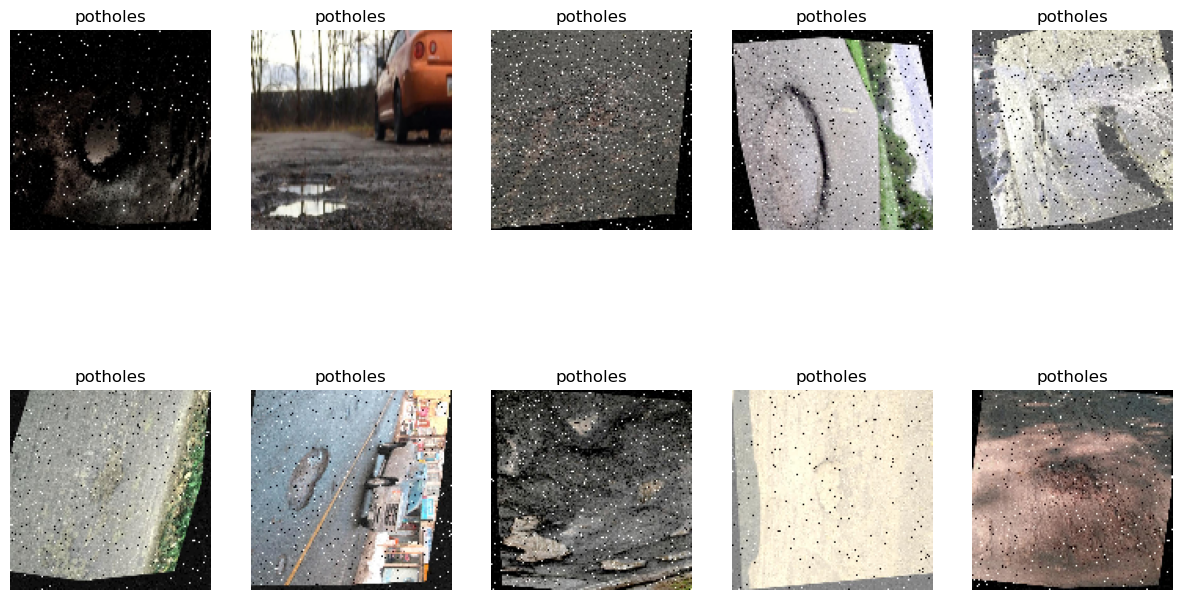

In [4]:
import random as rn
import matplotlib.pyplot as plt

# Check if X or y is empty
if len(X) == 0 or len(y) == 0:
    print("Error: X or y is empty.")
else:
    # Create the subplot grid
    fig, ax = plt.subplots(2, 5)
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.5)  # Adjust spacing for clarity
    fig.set_size_inches(15, 15)

    # Loop over rows and columns to plot images
    for i in range(2):  # Loop over rows
        for j in range(5):  # Loop over columns
            l = rn.randint(0, len(y) - 1)  # Ensure the index stays within bounds
            ax[i, j].imshow(X[l][:, :, ::-1])  # Display the image (with color channel reversal if necessary)
            ax[i, j].set_title(y[l])  # Set the title as the label
            ax[i, j].axis('off')  # Hide axes for better visualization
            ax[i, j].set_aspect('equal')

    plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Label Encoding for 'NORMAL' and 'POTHOLES'
le = LabelEncoder()
Y = le.fit_transform(y)  # Encode labels to integers (0 for NORMAL, 1 for POTHOLES)
Y = to_categorical(Y, 2)  # Convert to one-hot encoded labels for a 2-class problem

# Convert X to numpy array and normalize the images (if needed)
X = np.array(X)
X = X / 255.0  # Normalize the pixel values to [0, 1]

# Split the data into training and testing sets (75% train, 25% test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (4120, 128, 128, 3)
x_test shape: (1374, 128, 128, 3)
y_train shape: (4120, 2)
y_test shape: (1374, 2)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Create a CNN Sequential Model
model = Sequential()

# Add convolutional layers with pooling
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from convolution layers to feed into dense layers
model.add(Flatten())

# Add dropout layer for regularization
model.add(Dropout(0.4))

# Add dense fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer (2 classes - normal and pothole)
model.add(Dense(2, activation='softmax'))

# Compile the model with an optimizer and loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary to inspect the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,874 (1.74 MB)

 Trainable params: 455,874 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,874 (1.74 MB)

 Trainable params: 455,874 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train is one-hot encoded, we need to convert it to integer labels
y_train_int = np.argmax(y_train, axis=1)  # Convert one-hot encoded labels to integers (0 for normal, 1 for potholes)

# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_int), y=y_train_int)

# Create a dictionary for the class weights
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}  # Map class weights for each class

# Now you can train the model with class weights
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    batch_size=12, 
                    validation_data=(x_test, y_test), 
                    class_weight=class_weight_dict,  # Use class weights for training
                    verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy * 100))


Epoch 1/50
344/344 - 50s - 145ms/step - accuracy: 0.6519 - loss: 0.5526 - val_accuracy: 0.6696 - val_loss: 0.6753
Epoch 2/50
344/344 - 38s - 111ms/step - accuracy: 0.8073 - loss: 0.3302 - val_accuracy: 0.9134 - val_loss: 0.2062
Epoch 3/50
344/344 - 38s - 112ms/step - accuracy: 0.8767 - loss: 0.2567 - val_accuracy: 0.5852 - val_loss: 0.5855
Epoch 4/50
344/344 - 38s - 111ms/step - accuracy: 0.8638 - loss: 0.2269 - val_accuracy: 0.8996 - val_loss: 0.1574
Epoch 5/50
344/344 - 37s - 108ms/step - accuracy: 0.8454 - loss: 0.2638 - val_accuracy: 0.8646 - val_loss: 0.2595
Epoch 6/50
344/344 - 37s - 107ms/step - accuracy: 0.9158 - loss: 0.2044 - val_accuracy: 0.9352 - val_loss: 0.1362
Epoch 7/50
344/344 - 37s - 108ms/step - accuracy: 0.9175 - loss: 0.1546 - val_accuracy: 0.9338 - val_loss: 0.1277
Epoch 8/50
344/344 - 37s - 108ms/step - accuracy: 0.9303 - loss: 0.1472 - val_accuracy: 0.9309 - val_loss: 0.1603
Epoch 9/50
344/344 - 36s - 104ms/step - accuracy: 0.9197 - loss: 0.1392 - val_accuracy: 

In [10]:

loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9919 - loss: 0.0344
Test accuracy: 98.91%


In [11]:
# Making predictions on test data
prediction = model.predict(x_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step


In [12]:
#Transform predictions into 1D array 
import numpy as np
y_pred = np.argmax(prediction, axis=1)

In [13]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        

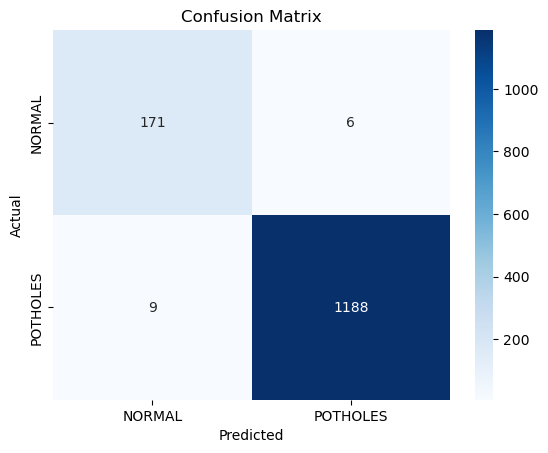

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'POTHOLES'], yticklabels=['NORMAL', 'POTHOLES'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **VGG16 Transfer Learning**

In [15]:
import os
import cv2
import numpy as np

IMG_SIZE = 128
epochs = 5
batch_size = 32

X = []
y = []

# Use a raw string literal for the base directory to prevent escape sequences
base_dir = r'D:\archive'  # or use double backslashes 'D:\\archive'

# Define paths for NORMAL and POTHOLES image directories
normal_path = os.path.join(base_dir, 'normal')
potholes_path = os.path.join(base_dir, 'potholes')

# Create a list of tuples (image_path, label) for all images
image_paths_labels = []

# Add all images from NORMAL
image_paths_labels += [(os.path.join(normal_path, f), 'normal') for f in os.listdir(normal_path) if f.endswith(('jpg', 'jpeg', 'png'))]
# Add all images from POTHOLES
image_paths_labels += [(os.path.join(potholes_path, f), 'potholes') for f in os.listdir(potholes_path) if f.endswith(('jpg', 'jpeg', 'png'))]

# Process images and labels
for image_path, label in image_paths_labels:
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(np.array(img))
            y.append(label)
        else:
            print(f"Warning: {image_path} could not be loaded.")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images and {len(y)} labels.")

Loaded 5494 images and 5494 labels.


In [16]:
import os

IMG_SIZE = 128

# Training config:
epochs = 5
batch_size = 32

filename = []
y = []

# Set base directory for 'archive'
base_dir = 'D:\archive'

# Define paths for train and valid image directories
train_images_path = os.path.join(base_dir, 'normal')
valid_images_path = os.path.join(base_dir, 'potholes')

# Process the imagepaths and assign appropriate labels based on the directory
# Assuming you are getting all the image file paths in your directory:
imagepaths = []  # This should be populated with actual file paths

for dirpath, _, filenames in os.walk(base_dir):
    for filename in filenames:
        # Get the full path of the image
        image_path = os.path.join(dirpath, filename)
        try:
            filename.append(image_path)  # Append full path as filename

            # Assign labels based on whether the image is from the NORMAL or POTHOLES set
            if dirpath.startswith(train_images_path):
                y.append('normal')  # Replace with actual labels if needed
            elif dirpath.startswith(valid_images_path):
                y.append('potholes')  # Replace with actual labels if needed
            else:
                continue
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            pass

In [17]:
import os
import cv2
import numpy as np
import pandas as pd

IMG_SIZE = 128
epochs = 5
batch_size = 32

X = []
y = []
filename = []  # Initialize filename list

# Use raw string literals to avoid issues with backslashes
base_dir = r'D:\archive'  # Use raw string literal or double backslashes for Windows paths

# Define paths for NORMAL and POTHOLES image directories
normal_path = os.path.join(base_dir, 'normal')
potholes_path = os.path.join(base_dir, 'potholes')

# Create a list of tuples (image_path, label) for all images
image_paths_labels = []

# Add all images from NORMAL
image_paths_labels += [(os.path.join(normal_path, f), 'normal') for f in os.listdir(normal_path) if f.endswith(('jpg', 'jpeg', 'png'))]
# Add all images from POTHOLES
image_paths_labels += [(os.path.join(potholes_path, f), 'potholes') for f in os.listdir(potholes_path) if f.endswith(('jpg', 'jpeg', 'png'))]

# Process images and labels
for image_path, label in image_paths_labels:
    try:
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(np.array(img))
            y.append(label)
            filename.append(image_path)  # Add file path to filename list
        else:
            print(f"Warning: {image_path} could not be loaded.")
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Create a DataFrame from the filename and label lists
img_df = pd.DataFrame(
    {'filename': filename,
     'y': y
    })

# Shuffle the DataFrame to randomize the order of the data
img_df = img_df.sample(frac=1).reset_index(drop=True)

# Print the DataFrame to verify
print(img_df.head())

print(f"Loaded {len(X)} images and {len(y)} labels.")

                                            filename         y
0                       D:\archive\potholes\2582.jpg  potholes
1                          D:\archive\normal\451.jpg    normal
2                        D:\archive\potholes\222.jpg  potholes
3                       D:\archive\potholes\2473.jpg  potholes
4  D:\archive\potholes\67_jpg.rf.480470e64c5d772d...  potholes
Loaded 5494 images and 5494 labels.


In [18]:
# Assuming img_df has been created and shuffled already

# Check if img_df is populated
if len(img_df) == 0:
    print("Error: img_df is empty. Ensure it is populated before splitting.")
else:
    # Calculate the number of samples for training (80% of the data)
    train_size = int(0.8 * len(img_df))  # 80% for training
    tr_img = img_df[:train_size]  # First 80% for training
    valid_img = img_df[train_size:]  # Remaining 20% for validation

    # Print the sizes of both sets
    print(f"Total data size: {len(img_df)}")
    print(f"Training data size: {tr_img.shape[0]}")
    print(f"Validation data size: {valid_img.shape[0]}")

    # Optional: Display the first few rows of each set to verify
    print("\nTraining Data Sample:")
    print(tr_img.head())
    print("\nValidation Data Sample:")
    print(valid_img.head())

Total data size: 5494
Training data size: 4395
Validation data size: 1099

Training Data Sample:
                                            filename         y
0                       D:\archive\potholes\2582.jpg  potholes
1                          D:\archive\normal\451.jpg    normal
2                        D:\archive\potholes\222.jpg  potholes
3                       D:\archive\potholes\2473.jpg  potholes
4  D:\archive\potholes\67_jpg.rf.480470e64c5d772d...  potholes

Validation Data Sample:
                                               filename         y
4395                       D:\archive\potholes\1094.jpg  potholes
4396                       D:\archive\potholes\1042.jpg  potholes
4397                        D:\archive\potholes\475.jpg  potholes
4398  D:\archive\potholes\192_jpg.rf.757893a89815f65...  potholes
4399                          D:\archive\normal\384.jpg    normal


In [19]:
from keras.applications import VGG16

# Set image size for the input layer
IMAGE_SIZE = [128, 128]

# Load the VGG16 model with pre-trained weights and without the top classification layer
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Print the model summary to check the architecture
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [21]:
from glob import glob
import os

# Set the base directory for 'archive'
base_dir = r'D:\archive'  # Use raw string literal or double backslashes

# List all subdirectories (folders) inside the 'archive' directory (normal and potholes)
folders = glob(os.path.join(base_dir, '*\\'))  # Use the pattern to match subdirectories

# List to store image paths and their labels
filename = []  # List to store image paths
y = []  # List to store labels

# Process the image paths and assign appropriate labels based on the directory
for folder in folders:
    # Get all image paths inside the current folder (only .jpg, .jpeg, .png files)
    images = glob(os.path.join(folder, '*.jpg')) + glob(os.path.join(folder, '*.jpeg')) + glob(os.path.join(folder, '*.png'))
    
    for image in images:
        try:
            filename.append(image)  # Append the full image path
            
            # Assign labels based on the folder names
            if 'normal' in folder.lower():  # Check if the folder is 'normal'
                y.append('normal')  # Label for 'NORMAL' images
            elif 'potholes' in folder.lower():  # Check if the folder is 'potholes'
                y.append('potholes')  # Label for 'POTHOLES' images
            else:
                continue  # Skip if the folder name doesn't match expected

        except Exception as e:
            print(f"Error processing {image}: {e}")
            pass

# Check the first few filenames and labels to verify
print(filename[:5], y[:5])


['D:\\archive\\normal\\1.jpg', 'D:\\archive\\normal\\10.jpg', 'D:\\archive\\normal\\100.jpg', 'D:\\archive\\normal\\101.jpg', 'D:\\archive\\normal\\102.jpg'] ['normal', 'normal', 'normal', 'normal', 'normal']


In [22]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

# Global Average Pooling layer instead of Flatten
x = GlobalAveragePooling2D()(vgg.output)

# Optional: Add a dense layer for more complexity
x = Dense(128, activation='relu')(x)

# Add Dropout layer for regularization
x = Dropout(0.5)(x)

# Output layer for classification based on the number of classes
output = Dense(len(folders), activation='softmax')(x)

# Define the final model
model = Model(inputs=vgg.input, outputs=output)

# Freeze the VGG16 layers to avoid updating them during the first training
for layer in vgg.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to inspect its architecture
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
# # our layers - you can add more if you want
# x = Flatten()(vgg.output)
# # x = Dense(1000, activation='relu')(x)
# prediction = Dense(len(folders), activation='softmax')(x)

In [24]:
# # create a model object
# model = Model(inputs=vgg.input, outputs=prediction)

In [25]:
# # view the structure of the model
# model.summary()

In [26]:
# Tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',  # Adam is generally a better default for many tasks
  metrics=['accuracy']
)

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input  # Ensure this import is correct

# Create an instance of ImageDataGenerator
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input  # This ensures proper preprocessing for VGG16
)

# Set the base directory for 'archive'
base_dir = r'D:\archive'  # Use raw string literal to prevent issues with backslashes

# Use the generator on your data (images directly in the 'normal' and 'potholes' folders)
train_generator = gen.flow_from_directory(
    base_dir,  # Path to the 'archive' folder (which contains 'normal' and 'potholes')
    target_size=(128, 128),  # Resize the images to the expected input size for the model
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=True  # Shuffle the data
)

valid_generator = gen.flow_from_directory(
    base_dir,  # Path to the 'archive' folder (which contains 'normal' and 'potholes')
    target_size=(128, 128),  # Resize the images to the expected input size for the model
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=False  # Typically, you don't shuffle validation data
)


Found 5496 images belonging to 2 classes.
Found 5496 images belonging to 2 classes.


Original min and max values in x[0]: -123.68 147.01541
Min value after normalization: 0
Max value after normalization: 255


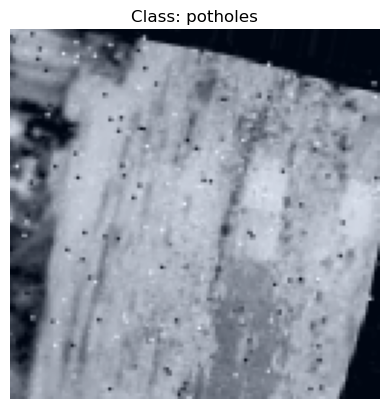

In [28]:
import matplotlib.pyplot as plt
import numpy as np

for x, y in train_generator:
    # Diagnostic print
    print("Original min and max values in x[0]:", x[0].min(), x[0].max())

    # Normalize to the range [0, 255]
    img_min, img_max = x[0].min(), x[0].max()
    img = (x[0] - img_min) / (img_max - img_min) * 255
    img = img.astype(np.uint8)

    # Confirm normalization range
    print("Min value after normalization:", img.min())
    print("Max value after normalization:", img.max())

    # Convert from BGR to RGB (if needed)
    img = img[..., ::-1]  # Reverse the color channels (BGR to RGB)

    # Get the label for the image (assuming y[0] is one-hot encoded)
    label_index = np.argmax(y[0])  # Find the index of the max value (one-hot encoded labels)
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the dictionary to map index to class name
    label = class_labels[label_index]  # Get the class name from the label index

    # Display the normalized image with class labels
    plt.imshow(img)
    plt.title(f"Class: {label}")  # Display the class label
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    break  # Stop after showing the first image


Original min and max values in x[0]: -123.68 149.77072
Min value after normalization: 0
Max value after normalization: 255


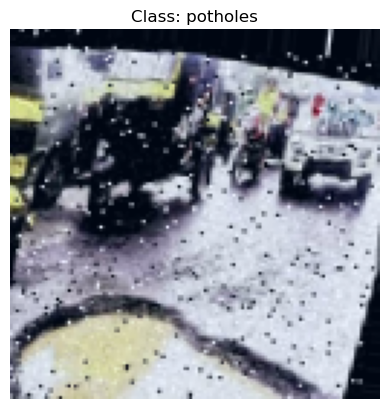

In [29]:
import matplotlib.pyplot as plt
import numpy as np

for x, y in train_generator:
    # Diagnostic print
    print("Original min and max values in x[0]:", x[0].min(), x[0].max())

    # Normalize to the range [0, 255]
    img_min, img_max = x[0].min(), x[0].max()
    img = (x[0] - img_min) / (img_max - img_min) * 255
    img = img.astype(np.uint8)

    # Confirm normalization range
    print("Min value after normalization:", img.min())
    print("Max value after normalization:", img.max())

    # Convert from BGR to RGB (if needed)
    img = img[..., ::-1]  # Reverse the color channels (BGR to RGB)

    # Get the label for the image (assuming y[0] is one-hot encoded)
    label_index = np.argmax(y[0])  # Find the index of the max value (one-hot encoded labels)
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the dictionary to map index to class name
    label = class_labels[label_index]  # Get the class name from the label index

    # Display the normalized image with class labels
    plt.imshow(img)
    plt.title(f"Class: {label}")  # Display the class label
    plt.axis('off')  # Hide axis for better visualization
    plt.show()

    break  # Stop after showing the first image


In [30]:
import numpy as np
import cv2  # Assuming you are working with OpenCV

# Load an image (you can use your specific image loading method)
image = cv2.imread(r'D:\archive\normal\221.jpg')

# Check original min and max pixel values
print("Original Min and Max Values:", image.min(), image.max())

# If you're performing any operations, such as normalization or scaling, ensure you check after
# Example: Normalizing image
image_normalized = image / 255.0  # Example of normalization to [0, 1] range

# Check if the values are still in the expected range
print("After Normalization Min and Max Values:", image_normalized.min(), image_normalized.max())

# If you are scaling or performing other operations, ensure values are in the valid range [0, 255]
image_scaled = np.interp(image_normalized, (image_normalized.min(), image_normalized.max()), (0, 255))

# Check the values again after scaling
print("After Scaling Min and Max Values:", image_scaled.min(), image_scaled.max())

# Clip values to ensure they fall within the range [0, 255]
image_clipped = np.clip(image_scaled, 0, 255)

# Final check
print("After Clipping Min and Max Values:", image_clipped.min(), image_clipped.max())

# Convert to uint8 (if needed)
image_final = image_clipped.astype(np.uint8)

# Save or use the image
cv2.imwrite('processed_image.jpg', image_final)


Original Min and Max Values: 0 255
After Normalization Min and Max Values: 0.0 1.0
After Scaling Min and Max Values: 0.0 255.0
After Clipping Min and Max Values: 0.0 255.0


True

In [31]:
# Ensure that IMAGE_SIZE is defined
IMAGE_SIZE = [128, 128]  # Adjust if needed

# Create the generator with flow_from_dataframe
test_gen = gen.flow_from_dataframe(
    dataframe=img_df,  # Assuming img_df has 'filename' and 'y' columns
    directory=None,  # Set to None if filenames in 'filename' column are absolute paths
    x_col="filename",  # The column name with image paths
    y_col="y",  # The column name with labels
    target_size=IMAGE_SIZE,  # Ensure the images are resized to the required size
    batch_size=32,  # You can adjust this based on your use case
    class_mode='categorical'  # Multi-class classification
)

# Check the class indices to ensure that the labels are mapped correctly
print(test_gen.class_indices)

Found 5494 validated image filenames belonging to 2 classes.
{'normal': 0, 'potholes': 1}


In [32]:
# Create a list to hold the labels in the correct order
labels = [None] * len(test_gen.class_indices)

# Populate the labels list with class names corresponding to their indices
for k, v in test_gen.class_indices.items():
    labels[v] = k

# Print the labels to check if the mapping is correct
print(labels)

['normal', 'potholes']


Original min and max values in x[0]: -122.560036 151.061
Min value after normalization: 0
Max value after normalization: 255


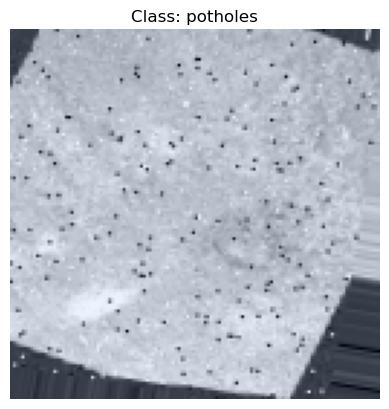

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for the two classes
labels = {0: 'normal', 1: 'potholes'}  # Update with the correct indices for your classes

try:
    for x, y in test_gen:
        # Diagnostic print
        print("Original min and max values in x[0]:", x[0].min(), x[0].max())

        # Normalize the image data to [0, 255]
        img_min, img_max = x[0].min(), x[0].max()
        img = (x[0] - img_min) / (img_max - img_min) * 255
        img = img.astype(np.uint8)

        # Confirm normalization range
        print("Min value after normalization:", img.min())
        print("Max value after normalization:", img.max())

        # Convert from BGR to RGB (if images are loaded in BGR format)
        img = img[..., ::-1]  # Reverse channels (BGR to RGB)

        # Get the label index (assuming one-hot encoding)
        label_index = np.argmax(y[0])  # Find the index of the max value (one-hot encoded labels)

        # Get the label name from the index
        label_name = labels.get(label_index, "Unknown")  # Get class name from the index

        # Display the normalized image with its class label
        plt.imshow(img)
        plt.title(f"Class: {label_name}")  # Display the class label
        plt.axis('off')  # Hide axis for a cleaner display
        plt.show()

        break  # Stop after showing the first image

except Exception as e:
    print(f"An error occurred: {e}")


In [34]:
train_path = 'D:\archive'  # Assuming this is the base path for your images

# Create generators
train_generator = gen.flow_from_dataframe(
    dataframe=tr_img,  # DataFrame containing training data
    x_col="filename",  # Column with full paths to images
    y_col="y",  # Column with labels (normal/potholes)
    target_size=IMAGE_SIZE,  # Resize images to target size
    shuffle=True,  # Shuffle training data
    batch_size=batch_size)  # Batch size for training

valid_generator = gen.flow_from_dataframe(
    dataframe=valid_img,  # DataFrame containing validation data
    x_col="filename",  # Column with full paths to images
    y_col="y",  # Column with labels (normal/potholes)
    target_size=IMAGE_SIZE,  # Resize images to target size
    shuffle=False,  # Don't shuffle validation data (important for evaluation)
    batch_size=batch_size)  # Batch size for validation


Found 4395 validated image filenames belonging to 2 classes.
Found 1099 validated image filenames belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Training ImageDataGenerator with data augmentation
train_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

# Validation ImageDataGenerator without augmentation
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Set up train and validation generators
train_generator = train_gen.flow_from_directory(
    r'D:\archive',  # Path to the folder containing 'NORMAL' and 'POTHOLES' subfolders
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Change to 'binary' if there are only two classes
    shuffle=True
)

valid_generator = valid_gen.flow_from_directory(
    r'D:\archive',  # Same structure as train
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',  # Change to 'binary' if only two classes
    shuffle=False
)

# Fit the model
try:
    history = model.fit(
        train_generator,
        validation_data=valid_generator,
        epochs=epochs,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_steps=valid_generator.samples // valid_generator.batch_size
    )
    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])
    print("Training Loss:", history.history['loss'][-1])
    print("Validation Loss:", history.history['val_loss'][-1])
except Exception as e:
    print("Error during training:", e)

Found 5496 images belonging to 2 classes.
Found 5496 images belonging to 2 classes.
Epoch 1/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8921 - loss: 1.4163